In [210]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [211]:
data = pd.read_csv("Marketing_campaign.csv")

In [212]:
data = data.dropna() #Removes NaN's
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [213]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [214]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [215]:
#Grouping basic.4y,6y and 9y as a same group
data['education'] = np.where(data['education']=='basic.9y','Basic',data['education'])
data['education'] = np.where(data['education']=='basic.6y','Basic',data['education'])
data['education'] = np.where(data['education']=='basic.4y','Basic',data['education'])

In [216]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [217]:
#Data Explorartion
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

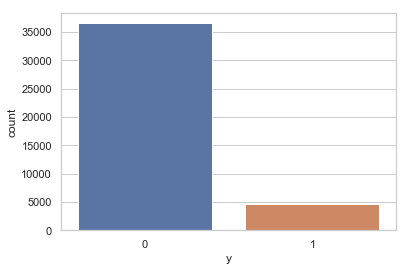

<Figure size 432x288 with 0 Axes>

In [218]:
sns.countplot(x='y',data=data) # 'data = name of the data frame/set'
plt.show()
plt.savefig('count_plot.png')

In [219]:
data.groupby('y').mean() #groupby with the numerical col's using mean

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [220]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [221]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [222]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


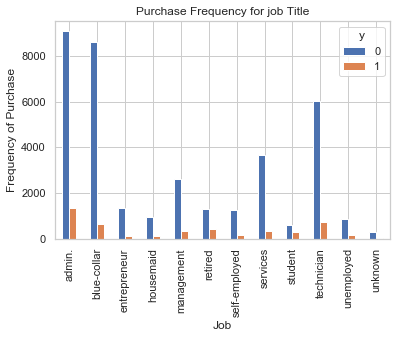

In [223]:
#Visualizations
#Cross Tab is highly effective for classification problem
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('crosstab')

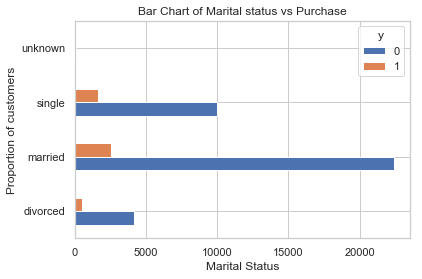

In [224]:
table=pd.crosstab(data.marital,data.y).plot(kind='barh')
plt.title('Bar Chart of Marital status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')
plt.savefig('marital_vs_pur_stack')

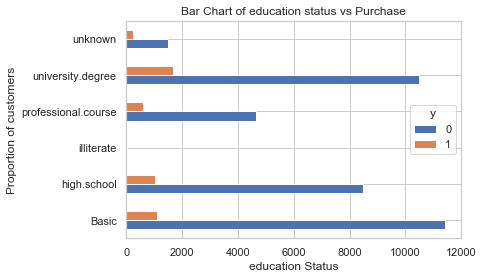

In [225]:
table=pd.crosstab(data.education,data.y).plot(kind='barh')
plt.title('Bar Chart of education status vs Purchase')
plt.xlabel('education Status')
plt.ylabel('Proportion of customers')
plt.savefig('edu_vs_pur_stack')

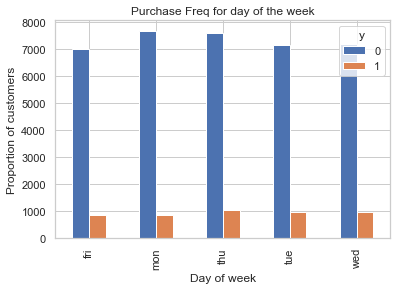

In [226]:
table=pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Freq for day of the week')
plt.xlabel('Day of week')
plt.ylabel('Proportion of customers')
plt.savefig('day_vs_pur_stack')

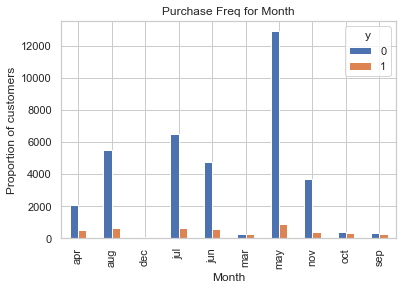

In [227]:
table=pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Freq for Month')
plt.xlabel('Month')
plt.ylabel('Proportion of customers')
plt.savefig('month_vs_pur_stack')

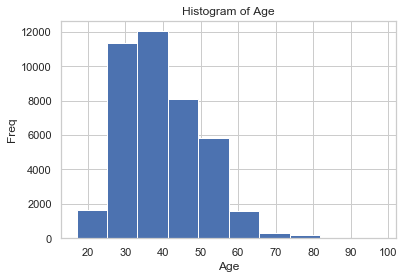

In [228]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.savefig('hist_age')

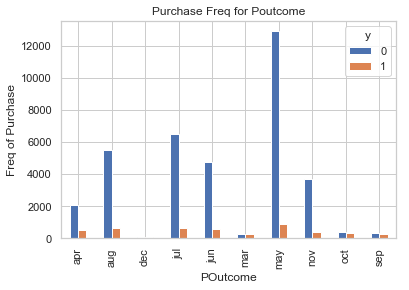

In [229]:
table=pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Freq for Poutcome')
plt.xlabel('POutcome')
plt.ylabel('Freq of Purchase')
plt.savefig('pur_fre_pout_bar')

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [231]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,Basic,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,Basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,Basic,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,Basic,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [232]:
#Create Dummy variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    #print(cat_list)
    cat_list = pd.get_dummies(data[var],prefix=var)
    data1 = data.join(cat_list)
    data = data1

In [233]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [234]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [235]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 62 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp_var_rate                     41188 non-null float64
cons_price_idx                   41188 non-null float64
cons_conf_idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr_employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired      

In [236]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
x=[i for i in data_final_vars if i not in y]

In [237]:
#Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,18) # no of variables need
rfe = rfe.fit(data_final[x],data_final[y])
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 40  1 13 17 16  1 27 11  1 24 39 42  1 31  1  1 19 21 41  2  3
  4 43  6  7 38  8 10 15  1 14 44 36 29 37 20 30 28 23  1  1  1 18 22 25
  1  1  1 32  5  9  1 34 26  1  1  1  1]


In [238]:
cols=['previous','euribor3m','job_blue-collar','job_retired','job_services','job_student','default_no',
      'month_aug','month_dec','month_jul','month_nov','day_of_week_fri','day_of_week_wed',
     'month_oct','month_sep','poutcome_failure','poutcome_nonexistent','poutcome_success']
x = data_final[cols]
y=data_final['y']

In [239]:
#Implememting the model
import statsmodels.api as sm
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Sun, 05 May 2019   Pseudo R-squ.:                  0.1844
Time:                        12:08:51   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

In [240]:
x_train,x_test,y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg =LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [241]:
y_pred = logreg.predict(x_test)

In [242]:
logreg.score(x_test,Y_test)

0.896091284292304

In [243]:
#Cross validation - helps to cross validate our model output of training test data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()

scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv=kfold,scoring=scoring)

print("10-fold cross validation average accuracy : %.3f" %(results.mean()))

10-fold cross validation average accuracy : 0.899


In [244]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[10827    99]
 [ 1185   246]]


In [246]:

from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10926
           1       0.71      0.17      0.28      1431

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.81      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357

